# Load data

In [92]:
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the datasets
credit_df = pd.read_csv('tmdb_5000_credits.csv')
movie_df = pd.read_csv('tmdb_5000_movies.csv')

# Rename the first column 'movie_id' to 'id' in credit_df
credit_df.rename(columns={'movie_id': 'id'}, inplace=True)

# Merge the two DataFrames on 'id'
df = pd.merge(credit_df, movie_df, on='id')

# Check the first 5 rows of the merged DataFrame
print(df.head())

       id                                   title_x  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  250000000 

# Check NA values

In [93]:
# Count null values for each column
null_counts = df.isna().sum()

# Print the number of null values in each column
print(null_counts)

id                         0
title_x                    0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_y                    0
vote_average               0
vote_count                 0
dtype: int64


# If a movie has a "homepage"
## *if 'homepage" column has value = 1
## *if 'homepage" column is NA =0

In [94]:
# Convert 'homepage' column: if NaN, return 0; if there's a value, return 1
df['homepage'] = df['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)

# Check the result
print(df['homepage'].value_counts())

0    3091
1    1712
Name: homepage, dtype: int64


# One-hot encoded all genres

In [95]:
# Define a function to extract genres
def extract_genres(genre_str):
    # Convert the string representation of the list into an actual list of dictionaries
    genre_list = ast.literal_eval(genre_str)
    return [genre['name'] for genre in genre_list]

# Apply the function to the 'genres' column
df['genres_list'] = df['genres'].apply(extract_genres)

# Create a set of all unique genres
all_genres = set([genre for sublist in df['genres_list'] for genre in sublist])

# Create a new column for each genre with 'genre_' prefix and set it to 1 if that genre is in the 'genres_list', otherwise 0
for genre in all_genres:
    df[f'genre_{genre.lower().replace(" ", "_")}'] = df['genres_list'].apply(lambda x: 1 if genre in x else 0)
# Drop the 'genres_list' column 
df.drop(columns=['genres_list'], inplace=True)

# Check the dataframe
print(df.head())

       id                                   title_x  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  250000000 

# One-hot encoded top 10 keyword

In [96]:
# Define a function to extract keywords from the 'Keywords' column
def extract_keywords(keyword_str):
    keyword_list = ast.literal_eval(keyword_str)
    return [keyword['name'] for keyword in keyword_list]

# Apply the function to the 'Keywords' column
df['keyword_list'] = df['keywords'].apply(extract_keywords)

# Flatten the list of keywords and get the most common 10 keywords
all_keywords = [keyword for sublist in df['keyword_list'] for keyword in sublist]
top_10_keywords = [keyword for keyword, _ in Counter(all_keywords).most_common(10)]

# Create one-hot encoded columns for the top 10 keywords, prefixed with "keyword_"
for keyword in top_10_keywords:
    df[f'keyword_{keyword}'] = df['keyword_list'].apply(lambda x: 1 if keyword in x else 0)

# Optionally drop the 'keyword_list' column
df.drop(columns=['keyword_list'], inplace=True)

# Check the dataframe
print(df.head())

       id                                   title_x  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  250000000 

# One-hot encoded top 10 production company

In [97]:
# Define a function to extract production company names
def extract_production_companies(companies_str):
    # Convert the string representation of the list into an actual list of dictionaries
    companies_list = ast.literal_eval(companies_str)
    return [company['name'] for company in companies_list]

# Apply the function to the 'production_companies' column
df['production_companies_list'] = df['production_companies'].apply(extract_production_companies)

# Flatten the list of production companies and get the frequency of each company
all_production_companies = [company for sublist in df['production_companies_list'] for company in sublist]
company_counts = pd.Series(all_production_companies).value_counts()

# Select the top-N production companies (e.g., top 10)
top_n_companies = company_counts.head(10).index.tolist()

# Create a new column for each of the top-N production companies with 'company_' prefix
for company in top_n_companies:
    df[f'company_{company.lower().replace(" ", "_")}'] = df['production_companies_list'].apply(lambda x: 1 if company in x else 0)

# Optionally drop the 'production_companies_list' column
df.drop(columns=['production_companies_list'], inplace=True)

# Check the dataframe
print(df.head())

       id                                   title_x  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  250000000 

# Drop all NA values in "tagline" column

In [98]:
# Drop rows with NaN values in all columns except 'tagline'
df = df.dropna(subset=[col for col in df.columns if col != 'tagline'])

# Check the first 5 rows of the cleaned DataFrame
print(df.head())

       id                                   title_x  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  250000000 

# One-hot encoded top 10 country

In [99]:
# Define a function to extract country names from the 'production_countries' column
def extract_countries(country_str):
    country_list = ast.literal_eval(country_str)
    return [country['name'] for country in country_list]

# Apply the function to the 'production_countries' column
df['country_list'] = df['production_countries'].apply(extract_countries)

# Flatten the list of countries and get the most common 10 countries
all_countries = [country for sublist in df['country_list'] for country in sublist]
top_10_countries = [country for country, _ in Counter(all_countries).most_common(10)]

# Create one-hot encoded columns for the top 10 countries
for country in top_10_countries:
    country_column_name = f'country_{country.lower().replace(" ", "_").replace("(", "").replace(")", "").replace(".", "").replace("-", "_")}'
    df[country_column_name] = df['country_list'].apply(lambda x: 1 if country in x else 0)

# Optionally drop the 'country_list' column
df.drop(columns=['country_list'], inplace=True)

# Check the dataframe
print(df.head())

       id                                   title_x  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  250000000 

# Add a column to indicate if "English" was included 
# Add a column count the total number of spoken languages. 

In [100]:
# Define a function to extract language names from the 'spoken_languages' column
def extract_languages(language_str):
    language_list = ast.literal_eval(language_str)
    return [language['name'] for language in language_list]

# Apply the function to the 'spoken_languages' column to create 'language_list'
df['language_list'] = df['spoken_languages'].apply(extract_languages)

# Create the 'spoken_english' column (1 if 'English' is in the language list, else 0)
df['spoken_english'] = df['language_list'].apply(lambda x: 1 if 'English' in x else 0)

# Create the 'spoken_languages_count' column to count the number of languages spoken
df['spoken_languages_count'] = df['language_list'].apply(len)

# Optionally drop the 'language_list' column
df.drop(columns=['language_list'], inplace=True)

# Check the dataframe
print(df.head())

       id                                   title_x  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew     budget  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  237000000   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  300000000   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  245000000   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  250000000 

# Check the distribution of Budget and Revenue

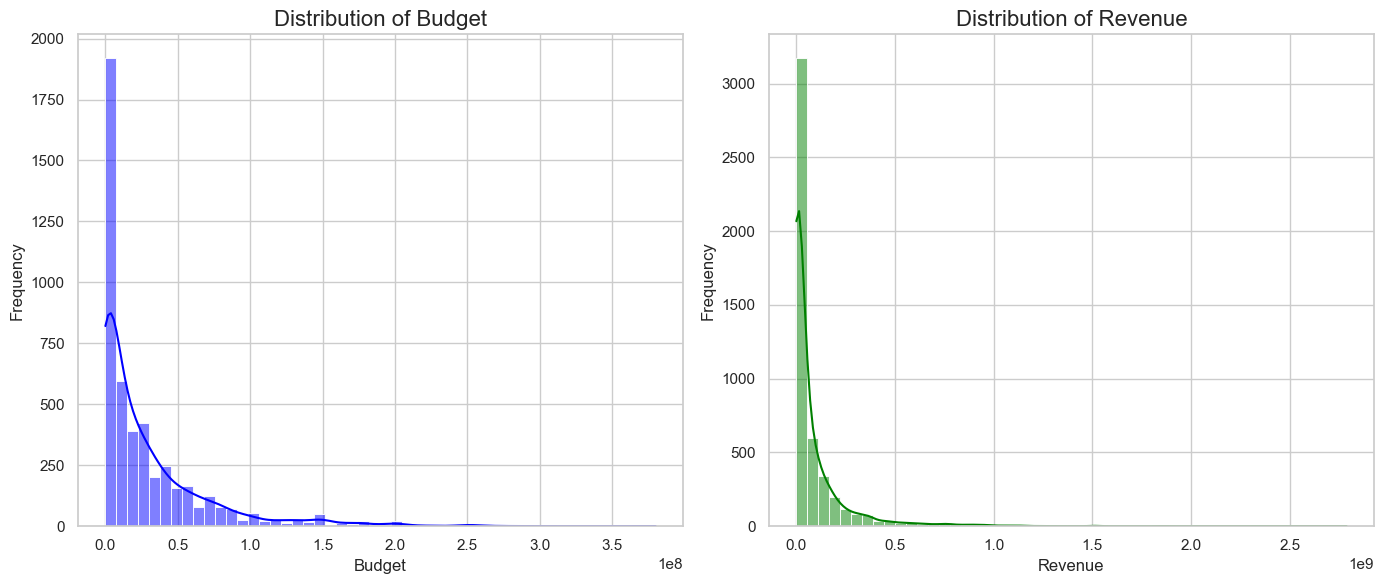

In [101]:
# Plot distributions for 'budget' and 'revenue'
plt.figure(figsize=(14, 6))

# Budget distribution
plt.subplot(1, 2, 1)  
sns.histplot(df['budget'], bins=50, kde=True, color='blue')
plt.title('Distribution of Budget', fontsize=16)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Revenue distribution
plt.subplot(1, 2, 2)  
sns.histplot(df['revenue'], bins=50, kde=True, color='green')
plt.title('Distribution of Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()  
plt.show()

# Count all movies with 0 budget or 0 revenue

In [102]:
# Count rows with zero values in 'budget' and 'revenue'
budget_zeros = (df['budget'] == 0).sum()
revenue_zeros = (df['revenue'] == 0).sum()

print(f"Number of rows with budget = 0: {budget_zeros}")
print(f"Number of rows with revenue = 0: {revenue_zeros}")

Number of rows with budget = 0: 1036
Number of rows with revenue = 0: 1423


# Filter out all movies with budget under 1000 and revenue under 1000

In [103]:
# Filter out rows where either 'budget' or 'revenue' is 0
filtered_df = df[(df['budget'] > 1000) & (df['revenue'] > 1000)]

print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {filtered_df.shape}")

Original DataFrame shape: (4799, 75)
Filtered DataFrame shape: (3211, 75)


# Check the distribution of Budget and Revenue again

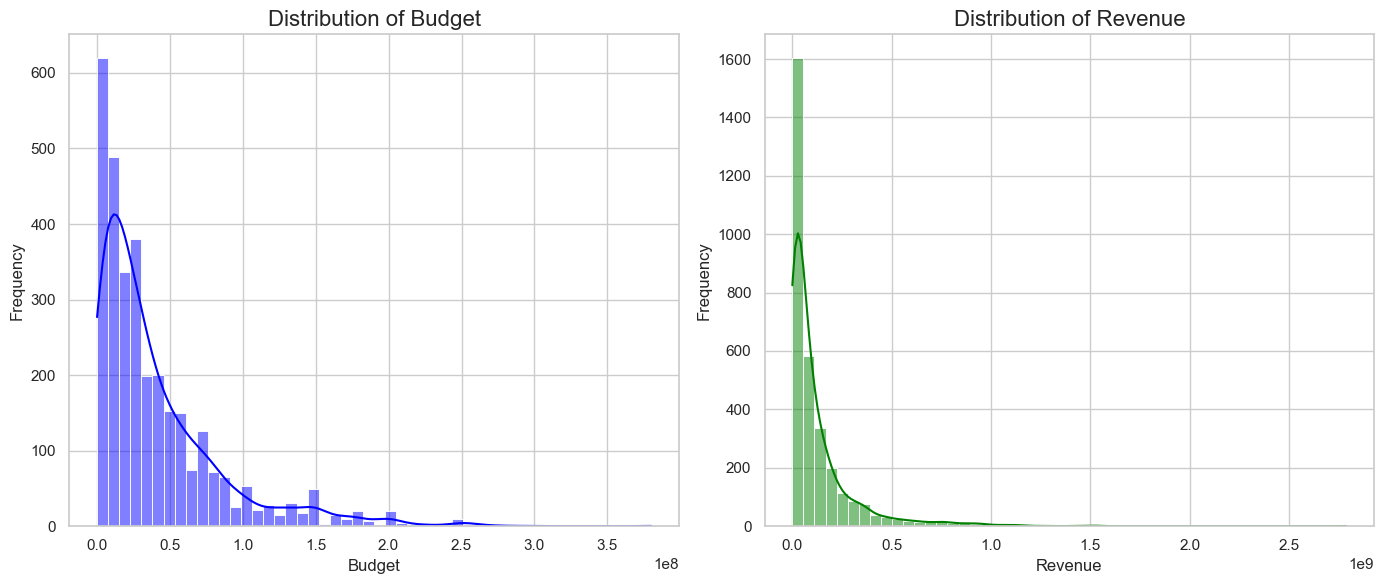

In [104]:
# Plot distributions for 'budget' and 'revenue'
plt.figure(figsize=(14, 6))

# Budget distribution
plt.subplot(1, 2, 1)  
sns.histplot(filtered_df['budget'], bins=50, kde=True, color='blue')
plt.title('Distribution of Budget', fontsize=16)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Revenue distribution
plt.subplot(1, 2, 2)  
sns.histplot(filtered_df['revenue'], bins=50, kde=True, color='green')
plt.title('Distribution of Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()  
plt.show()

# Check the statistics of column Budget and Revenue

In [105]:
print(filtered_df['budget'].describe())
print(filtered_df['revenue'].describe())

count    3.211000e+03
mean     4.086303e+07
std      4.443047e+07
min      7.000000e+03
25%      1.100000e+07
50%      2.500000e+07
75%      5.500000e+07
max      3.800000e+08
Name: budget, dtype: float64
count    3.211000e+03
mean     1.219165e+08
std      1.866064e+08
min      3.330000e+03
25%      1.729907e+07
50%      5.598732e+07
75%      1.473157e+08
max      2.787965e+09
Name: revenue, dtype: float64


# Only consider movies from 1990 to current year
# Adjust budget and revenue based on inflation rate

In [106]:
# Inflation rates (percentage) from 1980 to 2024
inflation_percentage = {
    1990: 5.4, 1991: 4.2, 1992: 3.0, 1993: 3.0, 1994: 2.6, 1995: 2.8,
    1996: 2.9, 1997: 2.3, 1998: 1.6, 1999: 2.2, 2000: 3.4, 2001: 2.8, 2002: 1.6, 2003: 2.3,
    2004: 2.7, 2005: 3.4, 2006: 3.2, 2007: 2.9, 2008: 3.8, 2009: -0.4, 2010: 1.6, 2011: 3.2,
    2012: 2.1, 2013: 1.5, 2014: 1.6, 2015: 0.1, 2016: 1.3, 2017: 2.1, 2018: 2.4, 2019: 1.8,
    2020: 1.2, 2021: 4.7, 2022: 8.0, 2023: 4.1, 2024: 3.2
}

# Filter the dataframe for movies released in 1980 or later
filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'], errors='coerce')
filtered_df['release_year'] = filtered_df['release_date'].dt.year
movies_after_1990 = filtered_df[filtered_df['release_year'] >= 1990]

# Adjust budget and revenue based on inflation percentages
def adjust_for_inflation(row):
    release_year = row['release_year']
    if release_year >= 1990:
        # Default to 0 if missing
        inflation_percentage_for_year = inflation_percentage.get(release_year, 0)  
        inflation_factor = 1 + (inflation_percentage_for_year / 100)
        adjusted_budget = row['budget'] * inflation_factor
        adjusted_revenue = row['revenue'] * inflation_factor
        return pd.Series({'adjusted_budget': adjusted_budget, 'adjusted_revenue': adjusted_revenue})
    return pd.Series({'adjusted_budget': row['budget'], 'adjusted_revenue': row['revenue']})

# Apply inflation adjustment
movies_after_1990[['adjusted_budget', 'adjusted_revenue']] = movies_after_1990.apply(adjust_for_inflation, axis=1)

# Display the count of movies from 1980 onward
num_movies_after_1990 = movies_after_1990.shape[0]
print(f'Number of movies released no earlier than 1990: {num_movies_after_1990}')

# Optionally, you can now check the adjusted budget and revenue for the movies
print(movies_after_1990[['title_x', 'release_year', 'budget', 'revenue', 'adjusted_budget', 'adjusted_revenue']].head())



C:\Users\billy\AppData\Local\Temp\ipykernel_16732\1819125988.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_date'] = pd.to_datetime(filtered_df['release_date'], errors='coerce')
C:\Users\billy\AppData\Local\Temp\ipykernel_16732\1819125988.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['release_year'] = filtered_df['release_date'].dt.year


Number of movies released no earlier than 1990: 2807
                                    title_x  release_year     budget  \
0                                    Avatar          2009  237000000   
1  Pirates of the Caribbean: At World's End          2007  300000000   
2                                   Spectre          2015  245000000   
3                     The Dark Knight Rises          2012  250000000   
4                               John Carter          2012  260000000   

      revenue  adjusted_budget  adjusted_revenue  
0  2787965087      236052000.0      2.776813e+09  
1   961000000      308700000.0      9.888690e+08  
2   880674609      245245000.0      8.815553e+08  
3  1084939099      255250000.0      1.107723e+09  
4   284139100      265460000.0      2.901060e+08  


C:\Users\billy\AppData\Local\Temp\ipykernel_16732\1819125988.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_after_1990[['adjusted_budget', 'adjusted_revenue']] = movies_after_1990.apply(adjust_for_inflation, axis=1)
C:\Users\billy\AppData\Local\Temp\ipykernel_16732\1819125988.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_after_1990[['adjusted_budget', 'adjusted_revenue']] = movies_after_1990.apply(adjust_for_inflation, axis=1)


# Check the distribution of Budget and Revenue again

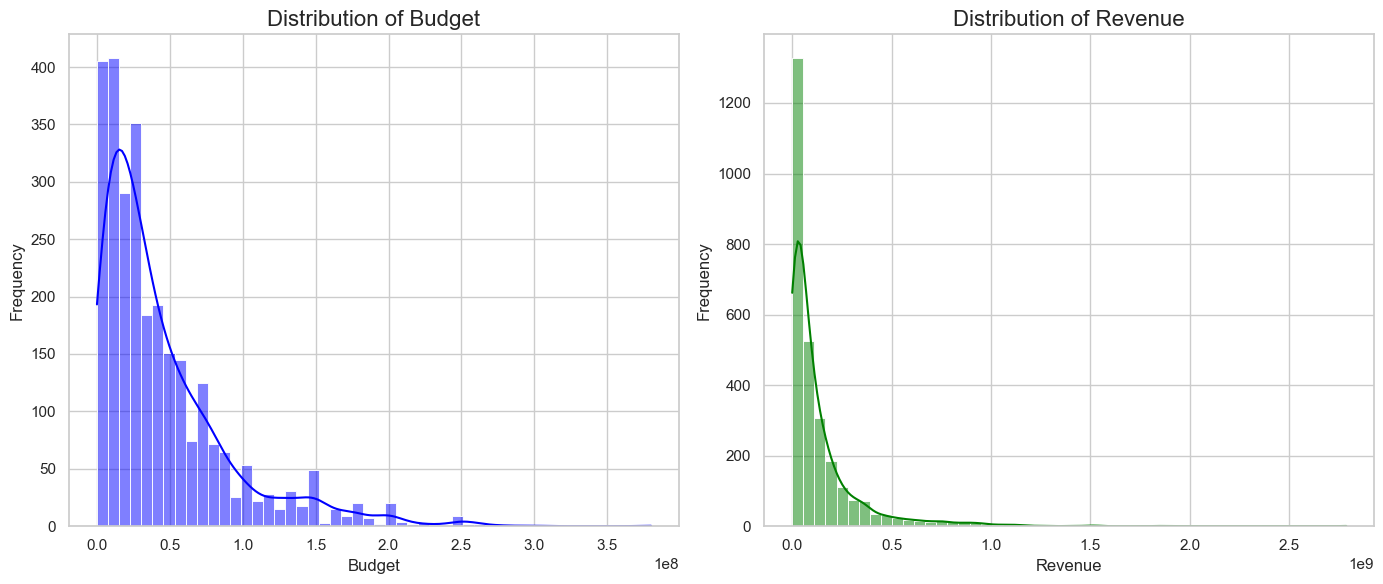

In [107]:
# Plot distributions for 'budget' and 'revenue'
plt.figure(figsize=(14, 6))

# Budget distribution
plt.subplot(1, 2, 1)  
sns.histplot(movies_after_1990['budget'], bins=50, kde=True, color='blue')
plt.title('Distribution of Budget', fontsize=16)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Revenue distribution
plt.subplot(1, 2, 2)  
sns.histplot(movies_after_1990['revenue'], bins=50, kde=True, color='green')
plt.title('Distribution of Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()  
plt.show()

# There are still a lot of outliers
# Only take the movies with budgets under 150 millions and revenue under 200 millions

In [108]:
# Set outlier thresholds
# 150 million
budget_outlier_threshold = 1.5 * 1e8  
# 200 million
revenue_outlier_threshold = 2.0 * 1e8  

# Remove rows with budget outliers and revenue outliers
filtered_df_no_outliers = movies_after_1990[(movies_after_1990['budget'] <= budget_outlier_threshold) & 
                                      (movies_after_1990['revenue'] <= revenue_outlier_threshold)]

# Show the count of movies after removing outliers
num_movies_after_outliers = filtered_df_no_outliers.shape[0]
print(f'Number of movies after removing outliers: {num_movies_after_outliers}')

# Optionally, display the adjusted budget and revenue for these movies
print(filtered_df_no_outliers[['title_x', 'release_year', 'budget', 'revenue']].head())

Number of movies after removing outliers: 2264
             title_x  release_year     budget    revenue
97     Shin Godzilla          2016   15000000   77000000
141  Mars Needs Moms          2011  150000000   38992758
142     Flushed Away          2006  149000000   64459316
143              Pan          2015  150000000  128388320
151          Beowulf          2007   70000000  195735876


# Check the distribution of Budget and Revenue again

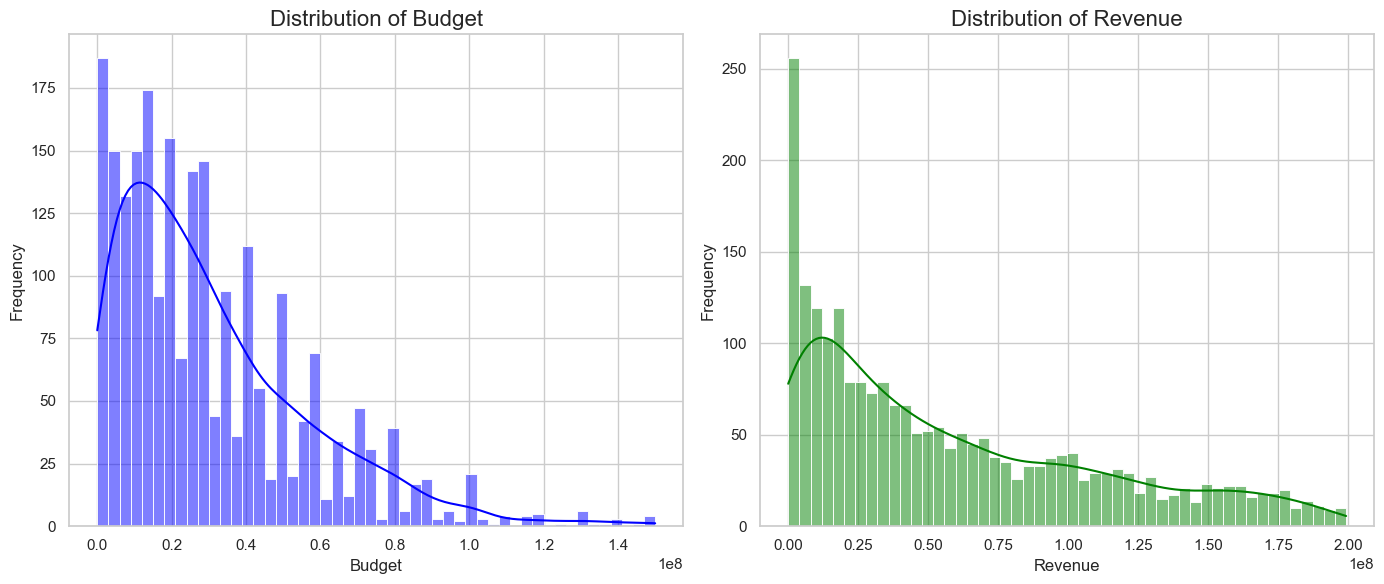

In [109]:
# Plot distributions for 'budget' and 'revenue'
plt.figure(figsize=(14, 6))

# Budget distribution
plt.subplot(1, 2, 1) 
sns.histplot(filtered_df_no_outliers['budget'], bins=50, kde=True, color='blue')
plt.title('Distribution of Budget', fontsize=16)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Revenue distribution
plt.subplot(1, 2, 2) 
sns.histplot(filtered_df_no_outliers['revenue'], bins=50, kde=True, color='green')
plt.title('Distribution of Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout() 
plt.show()

In [110]:
print(filtered_df_no_outliers['budget'].describe())
print(filtered_df_no_outliers['revenue'].describe())

count    2.264000e+03
mean     3.092713e+07
std      2.602193e+07
min      7.000000e+03
25%      1.200000e+07
50%      2.500000e+07
75%      4.500000e+07
max      1.500000e+08
Name: budget, dtype: float64
count    2.264000e+03
mean     5.814712e+07
std      5.266812e+07
min      3.330000e+03
25%      1.435566e+07
50%      4.148153e+07
75%      9.363776e+07
max      1.992000e+08
Name: revenue, dtype: float64


# Calculate ROI

In [111]:
# First, ensure that budget and revenue are numeric types
filtered_df_no_outliers['budget'] = pd.to_numeric(filtered_df_no_outliers['budget'], errors='coerce')
filtered_df_no_outliers['revenue'] = pd.to_numeric(filtered_df_no_outliers['revenue'], errors='coerce')
# Calculate ROI for the filtered data
filtered_df_no_outliers['ROI'] = ((filtered_df_no_outliers['revenue'] - filtered_df_no_outliers['budget']) / filtered_df_no_outliers['budget']) * 100

# Display the updated dataframe
print(filtered_df_no_outliers[['title_x', 'release_year', 'budget', 'revenue', 'ROI']].head())

# Get statistics for ROI
print(filtered_df_no_outliers['ROI'].describe())

             title_x  release_year     budget    revenue         ROI
97     Shin Godzilla          2016   15000000   77000000  413.333333
141  Mars Needs Moms          2011  150000000   38992758  -74.004828
142     Flushed Away          2006  149000000   64459316  -56.738714
143              Pan          2015  150000000  128388320  -14.407787
151          Beowulf          2007   70000000  195735876  179.622680
count    2.264000e+03
mean     8.426737e+02
std      2.713772e+04
min     -9.997440e+01
25%     -2.167476e+01
50%      7.203104e+01
75%      2.229362e+02
max      1.288939e+06
Name: ROI, dtype: float64


C:\Users\billy\AppData\Local\Temp\ipykernel_16732\4011787434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_outliers['budget'] = pd.to_numeric(filtered_df_no_outliers['budget'], errors='coerce')
C:\Users\billy\AppData\Local\Temp\ipykernel_16732\4011787434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_no_outliers['revenue'] = pd.to_numeric(filtered_df_no_outliers['revenue'], errors='coerce')
C:\Users\billy\AppData\Local\Temp\ipykernel_16732\4011787434.py:5: SettingWithCo

# Only consider movies with ROI under 1000%

In [112]:
# Filter out rows where ROI is less than 1000%
filtered_df_no_outliers = filtered_df_no_outliers[filtered_df_no_outliers['ROI'] <= 1000]

# Verify the result by checking the updated summary statistics
print(filtered_df_no_outliers['ROI'].describe())

count    2180.000000
mean      120.333144
std       203.865203
min       -99.974404
25%       -26.017948
50%        63.990701
75%       199.163933
max       988.377440
Name: ROI, dtype: float64


# Check Distribution of the ROI

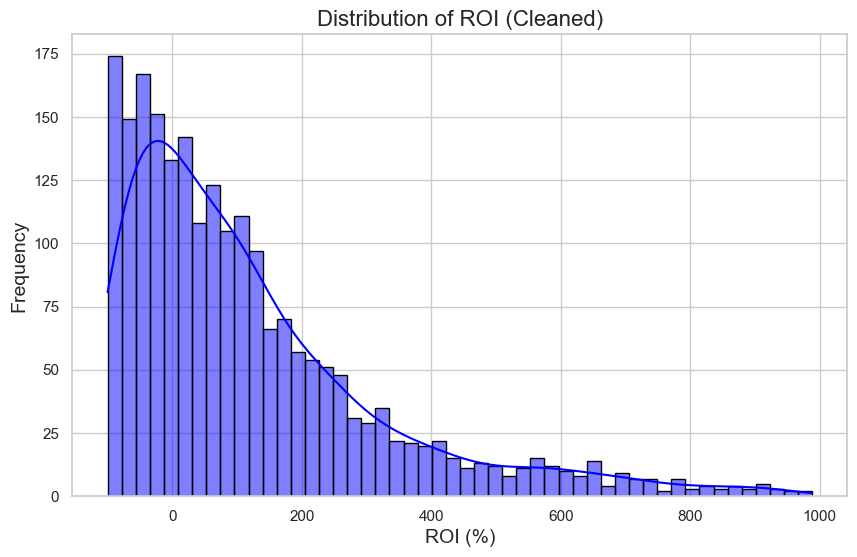

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_no_outliers['ROI'], bins=50, kde=True, color="blue", edgecolor="black")

# Add titles and labels
plt.title('Distribution of ROI (Cleaned)', fontsize=16)
plt.xlabel('ROI (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [114]:
filtered_df_no_outliers.shape[0]

2180

In [115]:
# Count null values for each column
null_counts = filtered_df.isna().sum()

# Print the number of null values in each column
print(null_counts)

id                        0
title_x                   0
cast                      0
crew                      0
budget                    0
                         ..
country_china             0
country_japan             0
spoken_english            0
spoken_languages_count    0
release_year              0
Length: 76, dtype: int64


# Make a new column count the number of cast of each movie

In [116]:
# Create the 'number_of_cast' column by counting the number of cast members in each movie
filtered_df_no_outliers['number_of_cast'] = filtered_df_no_outliers['cast'].apply(lambda x: len(ast.literal_eval(x)) if x != {} else 0)

# Check the cast counts
print(filtered_df_no_outliers['number_of_cast'].value_counts())


15     158
16     129
17     101
20      99
12      98
      ... 
99       1
85       1
113      1
103      1
0        1
Name: number_of_cast, Length: 110, dtype: int64


# Extract the data to CSV

In [117]:
filtered_df_no_outliers.to_csv('clean_movie_data.csv', index=False)
print("full DataFrame shape:", filtered_df_no_outliers.shape)

full DataFrame shape: (2180, 80)
